# "Implementing Support Vector Machines (SVM) Classifier using Python"

> "Explore how to implement the Support Vector Machine Algorithm in Python using a real-life dataset"


- toc: false
- branch: master
- badges: true
- comments: true
- author: Ijeoma Odoko
- categories: [python, supervised_machine_learning, classification, support vector machines]

## About

Explore how to implement the Support Vector Machines Algorithm in Python using a classification dataset from the UCI Machine Learning Repository.


### What is Support Vector Machines

Support Vector Machines also known as SVMs is a supervised machine learning algorithm that can be used to separate a dataset into two classes using a line. This line is called a maximal margin hyperplane, because the line typically has the biggest margin possible on each side of the line to the nearest point. 

See example below. 
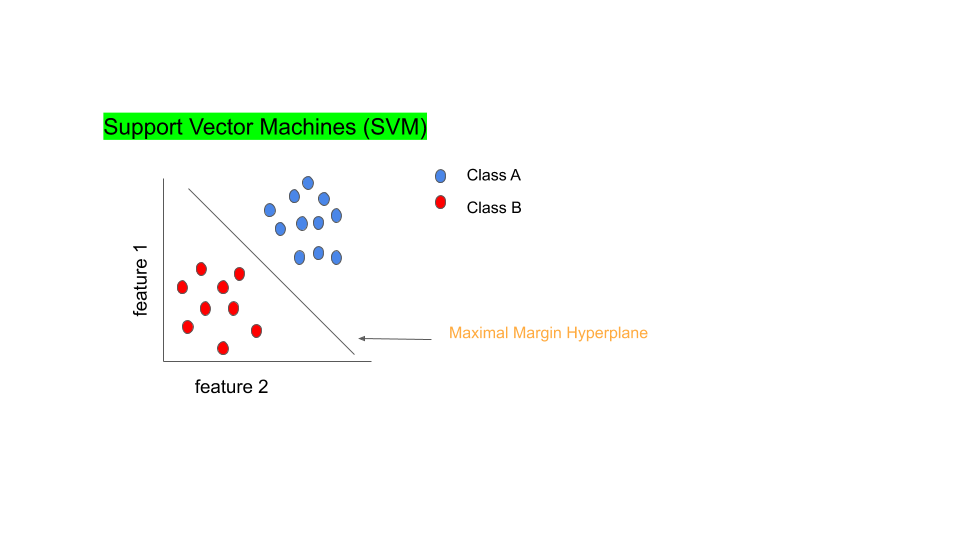

### Why and When to use Support Vector Machines?

Support Vector Machine can be used for supervised machine learning problems such as classification, regressions, and outlier detection. It is found to be effective in high dimensional spaces and also versatile.

They work best where there is a clear separation between classes. SVM is not ideal for large datasets that have lots of noise or overlapping classes.  If you have lots of features and large dataset, SVM might be slow. 



## Import Libraries and load dataset

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving hcvdat0.csv to hcvdat0.csv


In [ ]:
import io
hcv = pd.read_csv(io.BytesIO(uploaded['hcvdat0.csv'])) ##used BytesIO instead of StringIO

hcv

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Transform Dataset

This dataset has already been inspected in a previous blog post for Naive Bayes Classifier, so we just the exact same transformations. 



In [ ]:
# change the objects to category type data 
hcv['Category'] = hcv['Category'].astype('category')  # change the objects to category type data 
hcv['Sex'] = hcv["Sex"].astype('category')

In [ ]:
from sklearn.preprocessing import LabelEncoder # use label encoder for male vs female 

label = LabelEncoder()  #initialize 
hcv['Gender'] = label.fit_transform(hcv['Sex'])
hcv

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Gender,New Category
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1,0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1,0
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1,0
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1,0
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,0,3
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,0,3
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0,3
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0,3


In [ ]:
drop_index = hcv.loc[hcv['Category'] == '0s=suspect Blood Donor'].index  # Drop rows with Os=suspect blood donor
hcv.drop(drop_index, inplace=True)

In [ ]:
hcv_dict = {'0=Blood Donor': 0, '1=Hepatitis' : 1, '2=Fibrosis' : 2, '3=Cirrhosis': 3}

hcv["New Category"] = hcv['Category'].map(hcv_dict).astype('int32') # create new column for Category to remap values 
hcv

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Gender,New Category
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1,0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1,0
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1,0
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1,0
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,0,3
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,0,3
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0,3
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0,3


In [ ]:
hcv.dropna(how='any', inplace=True) # drop rows with null values 

## split into features and label/target

X = hcv.iloc[:, 2:-1].drop(columns = 'Sex').to_numpy() # features

y = hcv.iloc[:, -1].to_numpy() # label/target

## Create model 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn import svm

clf = svm.SVC() # Initiate svm.SVC (support vector classifier)

clf.fit(X_train, y_train)  # train model

y_pred = clf.predict(X_test) # perform prediction 

Time the SVM classifier

In [ ]:
import time
start = time.time()

from sklearn import svm

clf = svm.SVC() # Initiate svm.SVC (support vector classifier)

clf.fit(X_train, y_train)  # train model

stop = time.time()

print ('training time: ', round(stop - start, 3), 's')

training time:  0.005 s


In [ ]:
start = time.time()

y_pred = clf.predict(X_test) # perform prediction 

stop = time.time()

print ('prediction time: ', round(stop - start, 3), 's')


prediction time:  0.002 s


## Get accuracy 

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9430051813471503

## Try with different Kernels to see if performance improves. 

There are different Kernels that can be used with svm.SVC: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}.

However default=’rbf’.

The non-linear kernels are used where the relationship between X and y may not be linear. The decision boundary can be linear or non-linear.

In [ ]:
clf_linear = svm.SVC(kernel='linear') # Initiate SVM classifier with linear kernel

clf_linear.fit(X_train, y_train)  # train model
y_pred_linear= clf_linear.predict(X_test)

In [ ]:
clf_rbf = svm.SVC(kernel='rbf') # Initiate SVM classifier with rbf kernel

clf_rbf.fit(X_train, y_train)  # train model
y_pred_rbf= clf_rbf.predict(X_test)

In [ ]:
clf_poly = svm.SVC(kernel='poly') # Initiate SVM classifier with poly kernel

clf_poly.fit(X_train, y_train)  # train model
y_pred_poly= clf_poly.predict(X_test)

In [ ]:
model_eval = pd.DataFrame(columns=['Score'])

In [ ]:
model_eval.loc['Linear','Score'] = accuracy_score(y_pred_linear, y_test)

model_eval.loc['RBF','Score'] = accuracy_score(y_pred_rbf, y_test)

model_eval.loc['Polynomial','Score'] = accuracy_score(y_pred_poly, y_test)

model_eval

,Score
Linear,0.953368
RBF,0.943005
Polynomial,0.932642


## Other parameters you can pass to your Classifier when initiating it 

C: float, default=1.0 is a regularization parameter which trades off correct classification of the training set with the maximization of the margin for the decision boundary. With a larger value of C, you get a more accurate prediction but a more complex decision boundary.

gamma: {‘scale’, ‘auto’} or float, default=’scale’ is typically only used with the non-linear kernel.  When the gamma value is very low, the model is unable to capture or complexity of the data, it will be more similar to a linear model. However with a higher gamma value, there is greater chance of overfitting.

There are many other parameters you can pass, reference the Scikit Learn library (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). 

In [ ]:
clf_rbf2 = svm.SVC(kernel='rbf', C=10) # Initiate SVM classifier with linear kernel

clf_rbf2.fit(X_train, y_train)  # train model
y_pred_linear= clf_rbf2.predict(X_test)

accuracy_score(y_pred_linear, y_test)

0.9637305699481865

In [ ]:
clf_rbf2 = svm.SVC(kernel='rbf', C=1) # Initiate SVM classifier with linear kernel

clf_rbf2.fit(X_train, y_train)  # train model
y_pred_linear= clf_rbf2.predict(X_test)

accuracy_score(y_pred_linear, y_test)

0.9430051813471503

## Overfitting 

Overfitting data is something that you want to avoid. It is typically happens by over tweaking the parameters for the Support Vector Machines. 

## Speed Accuracy Tradeoff

There are many instances when real time prediction is more important than accuracy. Example could be credit fraud detection. Training a smaller training set will be faster, but will sacrifice some accuracy. 

In [ ]:
#X_train = X_train[1:10]
#y_train = y_train[1:10]
import time
start = time.time()
from sklearn import svm

clf = svm.SVC() # Initiate svm.SVC (support vector classifier)

clf.fit(X_train, y_train)  # train model
stop = time.time()

print ('training time: ', round(stop - start, 3), 's')

y_pred = clf.predict(X_test) # perform prediction 

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

training time:  0.004 s


0.9430051813471503

## References

[scikit learn - Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)

Support Vector Regression (SVR) using linear and non-linear kernels (https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

[UCI Machine Learning Repository - HCV dataset](https://archive.ics.uci.edu/ml/datasets/HCV+data). Accessed 15-Nov-2020.
